<a href="https://colab.research.google.com/github/sdasnoon/personal_projects/blob/master/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multiple Linear Regression**

Data Point : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

**Import Google libraries for authentication and file download**

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

**Authenticating with google to fetch files from google drive**

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Download data files**

In [0]:
downloaded = drive.CreateFile({'id':"1ClhnLtOZaefpj2ZDbOdvONTxbZ--mFy_"})  
downloaded.GetContentFile('winequality.csv')

**Import Numpy, Pandas, Scikit Learn and matplotlib** <br>
Numpy : Number processing <br>
Pandas : dataframe processing <br>
Scikit learn : Machine Learning <br>
Matplotlib : Plotting graphs

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

**Reading  data as complete dataframe**

In [0]:
dataset = pd.read_csv('winequality.csv')

**Describe the data**

In [0]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


**Find the data shape**

In [0]:
dataset.shape

(1599, 12)

**Check for null values**

In [0]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

**Fill Null if any**

In [0]:
dataset = dataset.fillna(method='ffill')

**Divide the dataset into dependent and independent variables**

In [0]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

**Plot to check the values of dependent variables**

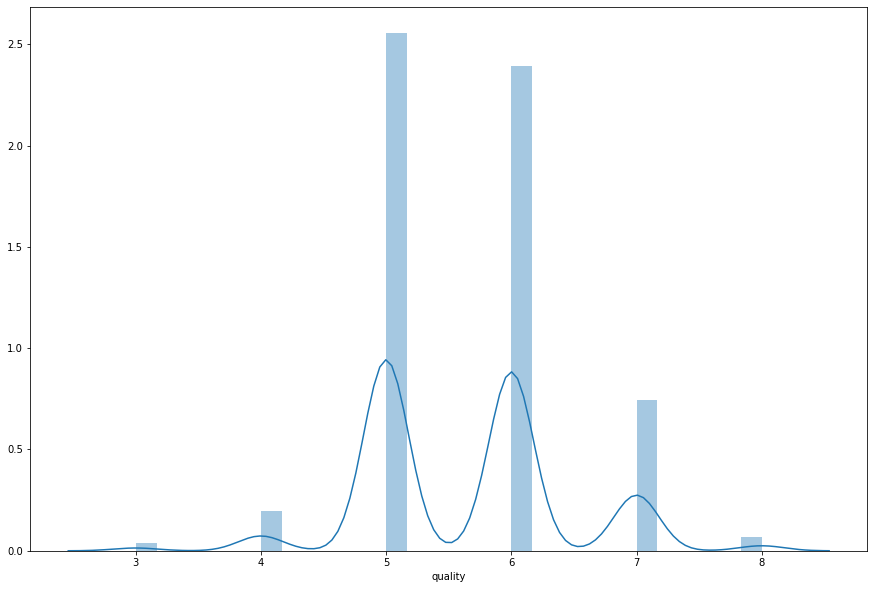

In [0]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['quality'])

**Assign Train and Test Data**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Fit MLR into our dataset**

In [0]:
clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

**Print Coefficients , MSE and R2 Square**

In [0]:
print('Coefficients: \n', clf.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))


print('R2_Square Value :',r2_score(y_test,y_pred))

Coefficients: 
 [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]
Mean squared error: 0.38
R2_Square Value : 0.3283887639580241


**Compare the predicted and actual values**

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [0]:
print(df.head(25))

    Actual  Predicted
0        6   5.782930
1        5   5.036193
2        7   6.596989
3        6   5.339126
4        5   5.939529
5        6   5.007207
6        5   5.396162
7        6   6.052112
8        4   4.867603
9        5   4.950676
10       5   5.285804
11       5   5.412653
12       6   5.705742
13       5   5.129217
14       6   5.528852
15       6   6.380524
16       7   6.810125
17       5   5.738033
18       5   5.976188
19       4   5.086134
20       7   6.344799
21       6   5.164010
22       6   5.642040
23       4   6.146290
24       6   5.481780
